<div class ="alert alert-block alert-info">
     1.import <b> Libraries </b>
</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle



<div class ="alert alert-block alert-info">
    2. Data <b> Loading </b>
</div>

In [2]:
df = pd.read_csv("global_flight_price_dataset.csv")

In [3]:
df

,Airline,Source,Destination,Date_of_Journey,Departure_Time,Arrival_Time,Duration,Stops,Price,Class
0,CloudJet,Tokyo,Dubai,15/05/2026,1:00,2:45,1.75,0,339,Business
1,JetWorld,Tokyo,Dubai,04/12/2025,12:00,13:15,1.25,2,456,Business
2,JetWorld,London,Singapore,25/09/2026,21:00,5:45,8.75,1,794,Business
3,CloudJet,Sydney,Paris,24/08/2026,14:15,15:00,1.75,2,292,Economy
4,SkyAir,New York,London,21/01/2026,0:15,4:15,4.00,0,306,Economy
...,...,...,...,...,...,...,...,...,...,...
295,GlobalFly,Dubai,New York,26/05/2026,5:30,14:15,9.75,0,551,Economy
296,JetWorld,Berlin,Tokyo,10/07/2026,3:30,14:00,11.50,2,751,Economy
297,JetWorld,Tokyo,Singapore,25/01/2026,4:45,15:00,11.25,2,991,Business
298,SkyAir,Dubai,Sydney,09/12/2025,22:45,5:45,7.00,0,660,Business


<div class ="alert alert-block alert-info">
    3. Data <b> Analysis </b>
</div>

In [4]:
df.head()

,Airline,Source,Destination,Date_of_Journey,Departure_Time,Arrival_Time,Duration,Stops,Price,Class
0,CloudJet,Tokyo,Dubai,15/05/2026,1:00,2:45,1.75,0,339,Business
1,JetWorld,Tokyo,Dubai,04/12/2025,12:00,13:15,1.25,2,456,Business
2,JetWorld,London,Singapore,25/09/2026,21:00,5:45,8.75,1,794,Business
3,CloudJet,Sydney,Paris,24/08/2026,14:15,15:00,1.75,2,292,Economy
4,SkyAir,New York,London,21/01/2026,0:15,4:15,4.00,0,306,Economy


In [5]:
df.tail()

,Airline,Source,Destination,Date_of_Journey,Departure_Time,Arrival_Time,Duration,Stops,Price,Class
295,GlobalFly,Dubai,New York,26/05/2026,5:30,14:15,9.75,0,551,Economy
296,JetWorld,Berlin,Tokyo,10/07/2026,3:30,14:00,11.50,2,751,Economy
297,JetWorld,Tokyo,Singapore,25/01/2026,4:45,15:00,11.25,2,991,Business
298,SkyAir,Dubai,Sydney,09/12/2025,22:45,5:45,7.00,0,660,Business
299,SkyAir,New York,Singapore,17/03/2026,11:15,21:30,10.25,0,637,Economy


In [6]:
df.shape

(300, 10)

In [7]:
df.sample(5)


,Airline,Source,Destination,Date_of_Journey,Departure_Time,Arrival_Time,Duration,Stops,Price,Class
284,CloudJet,Dubai,Tokyo,27/03/2026,7:15,12:45,5.50,2,656,Business
214,JetWorld,Sydney,Berlin,25/08/2026,17:00,4:00,11.00,0,863,Business
239,CloudJet,Toronto,Sydney,08/12/2025,22:00,1:00,3.00,1,491,Business
292,AirNova,Hong Kong,Sydney,13/03/2026,18:00,19:15,1.25,2,457,Business
288,AirNova,Dubai,Toronto,09/01/2026,7:15,12:45,5.50,0,373,Economy


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          300 non-null    object 
 1   Source           300 non-null    object 
 2   Destination      300 non-null    object 
 3   Date_of_Journey  300 non-null    object 
 4   Departure_Time   300 non-null    object 
 5   Arrival_Time     300 non-null    object 
 6   Duration         300 non-null    float64
 7   Stops            300 non-null    int64  
 8   Price            300 non-null    int64  
 9   Class            300 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 23.6+ KB


In [9]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Date_of_Journey    0
Departure_Time     0
Arrival_Time       0
Duration           0
Stops              0
Price              0
Class              0
dtype: int64

In [10]:
df.describe()

,Duration,Stops,Price
count,300.000000,300.000000,300.000000
mean,6.823333,1.036667,580.913333
std,3.457947,0.827206,209.443503
min,1.000000,0.000000,170.000000
25%,3.750000,0.000000,400.750000
50%,6.750000,1.000000,578.000000
75%,10.000000,2.000000,738.250000
max,12.750000,2.000000,1034.000000


In [11]:
df.nunique()

Airline              5
Source              10
Destination         10
Date_of_Journey    205
Departure_Time      90
Arrival_Time        95
Duration            48
Stops                3
Price              245
Class                2
dtype: int64

In [12]:
df["Airline"].unique()

array(['CloudJet', 'JetWorld', 'SkyAir', 'GlobalFly', 'AirNova'],
      dtype=object)

In [13]:
df.count()

Airline            300
Source             300
Destination        300
Date_of_Journey    300
Departure_Time     300
Arrival_Time       300
Duration           300
Stops              300
Price              300
Class              300
dtype: int64

**PRICE DISTRIBUTION GRAPH**

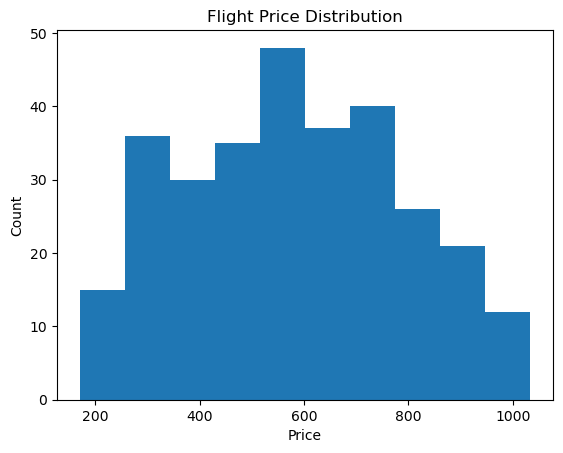

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["Price"])
plt.title("Flight Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


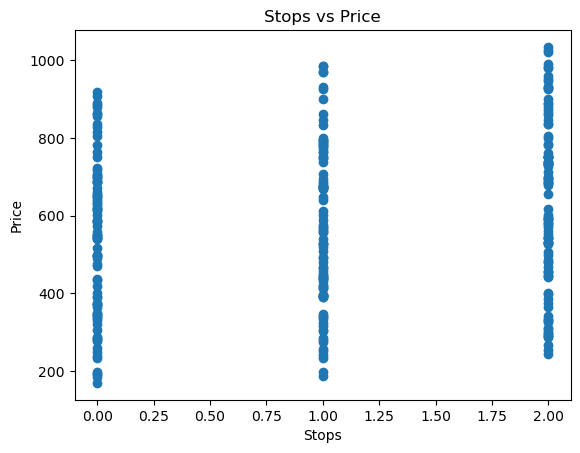

In [31]:
plt.figure()
plt.scatter(df["Stops"], df["Price"])
plt.title("Stops vs Price")
plt.xlabel("Stops")
plt.ylabel("Price")
plt.show()


<div class="alert alert-block alert-info">
    4. <b>Data Pre-Processing</b>
</div>

In [14]:
df['Price']=df['Price'].astype('int64') # for single columns

In [15]:
def changefloattypes(cols):  # for multiple coulms
    for i in cols:
        df[i]=df[i].astype('int64')
columns = ['Duration']
changefloattypes(columns)

In [16]:
def changeonstringintoInt(cols):
    for i in cols:
        data =pd.DataFrame({i:df[i].unique()})
        data_LE = LabelEncoder()
        data_LE.fit(np.ravel(data)) 
        df[i]=data_LE.transform(df[i]) 
columns = [
    'Airline',
    'Source',
    'Destination',
    'Date_of_Journey',
    'Departure_Time',
    'Arrival_Time',
    'Class'
]
changeonstringintoInt(columns)   

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          300 non-null    int64
 1   Source           300 non-null    int64
 2   Destination      300 non-null    int64
 3   Date_of_Journey  300 non-null    int64
 4   Departure_Time   300 non-null    int64
 5   Arrival_Time     300 non-null    int64
 6   Duration         300 non-null    int64
 7   Stops            300 non-null    int64
 8   Price            300 non-null    int64
 9   Class            300 non-null    int64
dtypes: int64(10)
memory usage: 23.6 KB


In [18]:
df.to_csv('processed_data.csv', index=False, header=True)

In [19]:
df = pd.read_csv('processed_data.csv')
df

,Airline,Source,Destination,Date_of_Journey,Departure_Time,Arrival_Time,Duration,Stops,Price,Class
0,1,8,1,92,42,67,1,0,339,0
1,3,8,1,25,11,17,1,2,456,0
2,3,3,6,168,50,79,8,1,794,0
3,1,7,5,161,19,24,1,2,292,1
4,4,4,3,139,1,73,4,0,306,1
...,...,...,...,...,...,...,...,...,...,...
295,2,1,4,173,72,21,9,0,551,1
296,3,0,8,55,66,20,11,2,751,1
297,3,8,6,163,70,24,11,2,991,0
298,4,1,7,51,57,79,7,0,660,0


<div class="alert alert-block alert-info">
    5. <b>Train - Test Splitting</b>
</div>

In [20]:
X=df.drop('Price',axis=1)
Y=df['Price']

In [21]:
print(X)

     Airline  Source  Destination  Date_of_Journey  Departure_Time  \
0          1       8            1               92              42   
1          3       8            1               25              11   
2          3       3            6              168              50   
3          1       7            5              161              19   
4          4       4            3              139               1   
..       ...     ...          ...              ...             ...   
295        2       1            4              173              72   
296        3       0            8               55              66   
297        3       8            6              163              70   
298        4       1            7               51              57   
299        4       4            6              105               8   

     Arrival_Time  Duration  Stops  Class  
0              67         1      0      0  
1              17         1      2      0  
2              79         8

In [22]:

train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.2, shuffle=False)

In [23]:
print("X_train shape:", train_X.shape)
print("X_test shape:", test_X.shape)
print("y_train shape:", train_Y.shape)
print("y_test shape:", test_Y.shape)


X_train shape: (240, 9)
X_test shape: (60, 9)
y_train shape: (240,)
y_test shape: (60,)


<div class="alert alert-block alert-info">
    6. <b>Model Training</b>
</div>

In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_X, train_Y)


RandomForestRegressor(random_state=42)

In [25]:
y_pred= model.predict(test_X)
y_pred


array([389.08, 535.88, 682.78, 674.81, 734.05, 753.32, 554.47, 259.  ,
       506.12, 247.55, 845.47, 544.5 , 544.19, 637.47, 734.79, 663.67,
       257.39, 301.49, 832.25, 250.04, 313.4 , 966.08, 403.05, 527.99,
       712.86, 320.94, 292.48, 257.74, 782.82, 985.21, 823.11, 698.92,
       844.14, 420.95, 820.85, 668.99, 825.09, 363.92, 505.8 , 669.34,
       883.75, 719.25, 262.53, 722.64, 674.66, 515.43, 689.94, 782.59,
       360.17, 510.24, 582.18, 582.89, 475.82, 715.66, 892.9 , 574.02,
       746.39, 955.94, 639.56, 641.2 ])

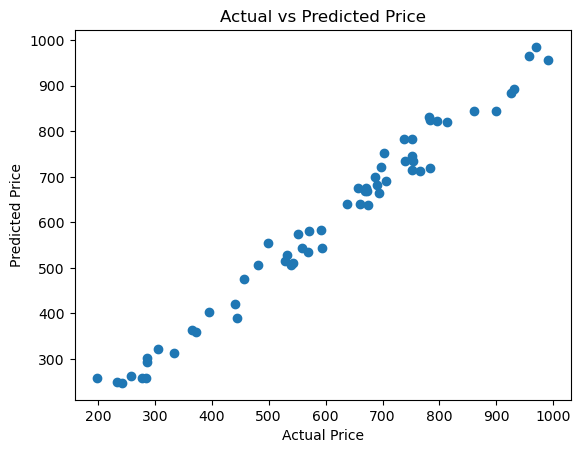

In [35]:
plt.figure()
plt.scatter(test_Y, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(test_Y, y_pred)
print("R2 Score:", r2)


R2 Score: 0.9797768160456282


In [27]:

with open("flight_price_model.pkl", "wb") as file:
    pickle.dump(model, file)


In [28]:
with open("flight_price_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)





In [29]:
import pickle

model = pickle.load(open("Flight-price-webapp/static/model/flight_price_model.pkl", "rb"))

print(model.n_features_in_)


9
